# Structure from motion

In [6]:
from src.corres_search import *
from src.reconstruction import *

%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [7]:
# Load Images

img1 = cv.imread("data/fountain-P11/images/0006.jpg")
img1 = cv.cvtColor(img1, cv.COLOR_BGR2RGB)
img2 = cv.imread("data/fountain-P11/images/0004.jpg")
img2 = cv.cvtColor(img2, cv.COLOR_BGR2RGB)

In [8]:
# Extract and save keypoints

kp1, desc1 = extract_features(img1)
kp2, desc2 = extract_features(img2)

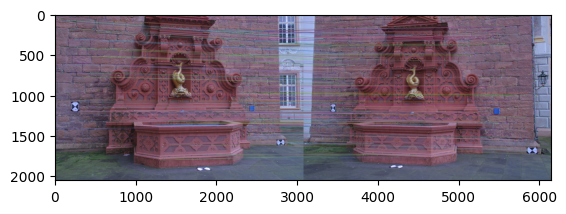

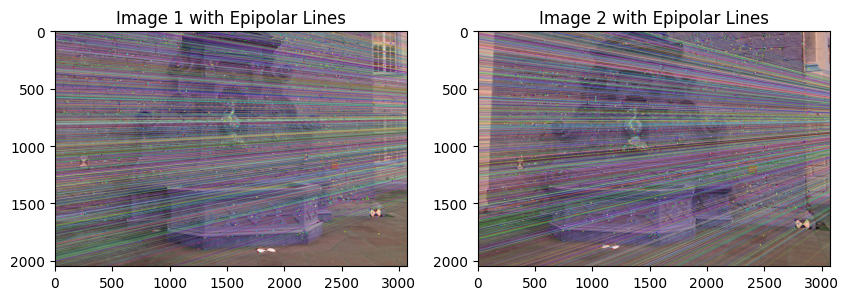

In [9]:
kp_matched = match_keypoints(desc1, desc2)

matched_img = draw_matches(img1, img2, kp1, kp2, kp_matched, num_matches=300)
plt.imshow(matched_img)
plt.show()

pts1 = np.float32([kp1[m.queryIdx].pt for m in kp_matched])
pts2 = np.float32([kp2[m.trainIdx].pt for m in kp_matched])

F = calculate_fund_matrix(pts1, pts2)
img1_lines, img2_lines = get_epipolar_line(img1, img2, F, pts1, pts2)

plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(cv.cvtColor(img1_lines, cv.COLOR_BGR2RGB))
plt.title("Image 1 with Epipolar Lines")

plt.subplot(1, 2, 2)
plt.imshow(cv.cvtColor(img2_lines, cv.COLOR_BGR2RGB))
plt.title("Image 2 with Epipolar Lines")

plt.show()

## DRAW KEYPOINTS

# img1_kps=cv.drawKeypoints(img1, kp1, img1, flags=cv.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)
# img2_kps=cv.drawKeypoints(img2, kp2, img2, flags=cv.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)

# fig,ax=plt.subplots(ncols=2,figsize=(18,8)) 
# ax[0].imshow(img1_kps)
# ax[0].title.set_text("fountain-0004")
# ax[1].imshow(img2_kps)
# ax[0].title.set_text("fountain-0006")
# plt.show()